# Parametric vs. Nonparametric modeling: The -Nearest Neighbors Algorithm
# Scikit-learn
## part 1. parametric and non-parametric models
Finding a function approximation created from input or predictor variables and whose output represents the response variable is the goal of training machine learning models. It's named function approximation because there's always a difference between the value of the function output and the actual or real-world value. Furthermore, one component of this inaccuracy is reducible in the sense that it may be improved by adding more characteristics or techniques. Another feature of this mistake is irreducible, which denotes an uncontrollable random error.

Here is an example of the linear model also called as linear regression model and related parameters (coefficients).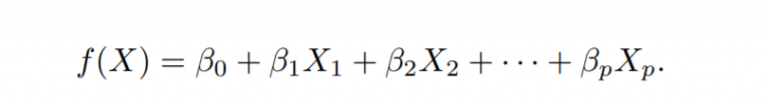Such models are called as parametric machine learning models.

With creating non-parametric models, no explicit assumptions regarding the functional form are made, unlike when creating parametric models. Non-parametric models, on the other hand, may be thought of as a function approximation that comes as near to the data points as feasible. Non-parametric models have the benefit over parametric techniques in that they may accurately match a larger variety of possible shapes for the real or true function by removing the assumption of a certain functional form, such as a linear model. Any parametric technique has the risk of a functional form (linear model) that differs significantly from the underlying function, resulting in a model that does not fit the data well. Fully non-linear algorithms, for example, are examples of non-parametric models.

* Some examples of popular nonparametric machine learning algorithms are:
1. k-Nearest Neighbors
2. Decision Trees like CART and C4.5
3. Support Vector Machines

## k-nearest neighbors algorithm
The k-nearest neighbors (KNN) algorithm is a data classification method for estimating the likelihood that a data point will become a member of one group or another based on what group the data points nearest to it belong to. The k-nearest neighbor algorithm is a type of supervised machine learning algorithm used to solve classification and regression problems. 

Unlike artificial neural network classification, k-nearest neighbors classification is straightforward to comprehend and execute. It's suitable for scenarios with well-defined or non-linear data points.
To put it another way, KNN uses a voting method to decide the class of an unobserved observation. This signifies that the data point's class will be determined by the class with the most votes.
If the value of K is one, we'll just utilize the nearest neighbor to identify the data point's class. If K equals ten, we'll use the ten closest neighbors, and so on.
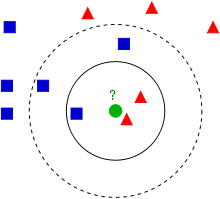
### How to use
The following is the pseudocode for KNN:
1. Load the data
2. Choose K value
3. For each data point in the data:
* Find the Euclidean distance to all training data samples
* Store the distances on an ordered list and sort it
* Choose the top K entries from the sorted list
* Label the test point based on the majority of classes present in the selected points

### Advantages
One of the biggest benefits of utilizing the KNN method is that you don't have to develop a model or modify multiple parameters. There is no need to train the model since it is a lazy learning algorithm rather than an eager learner; instead, all data points are used at the moment of prediction.

### Disadvantages 
Of course, this is computationally and time-intensive. You can use KNN to solve regression and classification issues if you have the necessary processing resources. Even yet, there are a number of speedier algorithms that can make accurate predictions.

## Data set
To illustrate this point, let us import the following packages, load the penguins dataset, and show data related with the bill_length versus bill_depth.

**Bill dimensions**
The culmen is the upper ridge of a bird’s bill. In the simplified penguins data, culmen length and depth are renamed as variables bill_length_mm and bill_depth_mm to be more intuitive.

**flipper_length_mm**: flipper length (mm)

**body_mass_g**: body mass (g)

**island**: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)

**sex**: penguin sex

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from seaborn import load_dataset
from sklearn.model_selection import train_test_split
import numpy as np
df = load_dataset('penguins')
print(df.head())
df = df.dropna()
X = df[['bill_length_mm','bill_depth_mm']].to_numpy()
y = df['species'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


**For our distance measure, we will choose the Euclidean distance**

The distance between two objects that are not points is usually defined to be the smallest distance among pairs of points from the two objects.

$ d(p,q)={\sqrt {(p-q)^{2}}}$

Two dimensions

$d(p,q)={\sqrt {(q_{1}-p_{1})^{2}+(q_{2}-p_{2})^{2}}}$

In [10]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

print(f"The distance between point 10 and 67 is {distance(X[10], X[67])}")

The distance between point 10 and 67 is 9.265527507918797


**Here we got the distance is 9.265527507918797 and we will use this distance to compute the k-nearest neighbors of a given point**

In [10]:
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    # Create an empty list to store neighbors and distances
    neighbors = []
    
    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        temp_data = [p, label, d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

In [11]:
# Test the k_nearest_neighbors function
k_nearest_neighbors(X_test[-1], X_train, y_train, 5)

[[array([50.9, 17.9]), 'Chinstrap', 0.4999999999999993],
 [array([51.5, 18.7]), 'Chinstrap', 0.5385164807134515],
 [array([50.8, 18.5]), 'Chinstrap', 0.5830951894845304],
 [array([52. , 18.1]), 'Chinstrap', 0.70710678118655],
 [array([50.8, 19. ]), 'Chinstrap', 0.943398113205661]]

In [12]:
# Show the true label 
y_test[-1]

'Chinstrap'

In [13]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k

In [14]:
# Test our function 
KNN_Predict(X_test[-1], X_train, y_train, 5)

'Chinstrap'

**Here we can see that the test result is the true label**

In [15]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for point, label in zip(test_features, test_labels):
        error += label != KNN_Predict(point, 
                                      training_features, 
                                      training_labels, 
                                      k)
    return error/len(test_features)

In [16]:
# Test our function
classification_error(X_test, y_test, X_train, y_train, 7)

0.045454545454545456

**We should minimize the Classification Error Probability**

### How to choose optimal value of K in KNN Algorithm
1. Square Root Method: Take square root of the number of samples in the training dataset.

2. Cross Validation Method: We should also use cross validation to find out the optimal value of K in KNN. Start with K=1, run cross validation (5 to 10 fold).

3. Domain Knowledge also plays a vital role while choosing the optimum value of K.

4. K should be an odd number.

In [17]:
possible_k = [k for k in range(3, 26, 2)]
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]

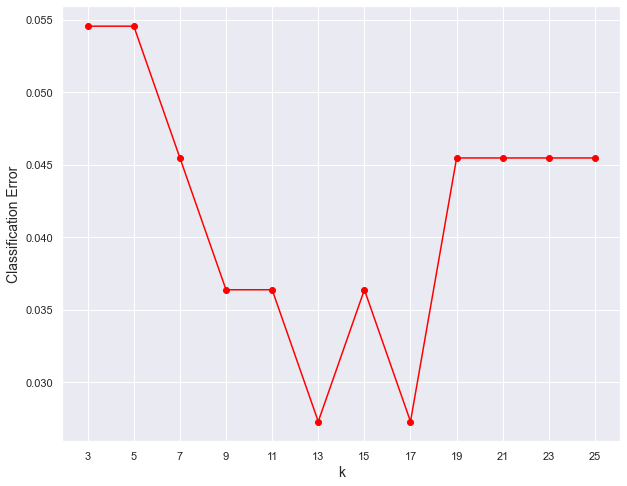

In [18]:
plt.figure(figsize = (10, 8))
plt.plot(possible_k, errors, color = 'red', marker = "o")
plt.xlabel('k', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xticks(possible_k)
plt.show()

**For different level k, classification Errors are different**

# Part2. Scikit-learn
Scikit-learn (previously scikits.learn, and also known as sklearn) is a free Python machine learning package. It includes support-vector machines, random forests, gradient boosting, k-means, and DBSCAN, among other classification, regression, and clustering techniques, and is designed to work with the Python numerical and scientific libraries NumPy and SciPy. Scikit-learn is a financially supported NumFOCUS project.

In this notebook we introduce the basic concepts of the scikit-learn API.

In [20]:
# Implement our KNN algorithm for classification in the test dataset
predicted_labels = [KNN_Predict(point,
                                X_train,
                                y_train,
                                7) for point in X_test]

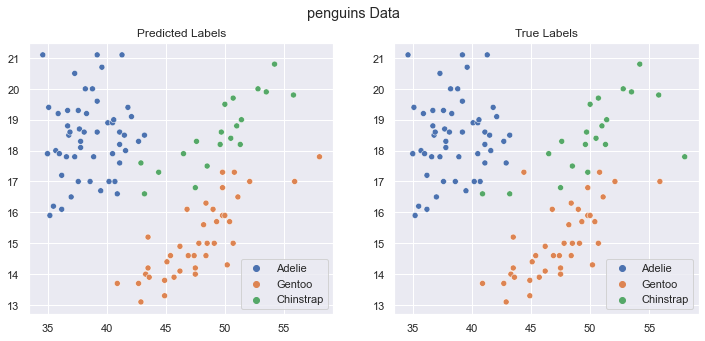

In [22]:
fig, ax = plt.subplots(ncols = 2,
                       figsize = (12, 5))

sns.scatterplot(x = X_test[:, 0], y = X_test[:, 1], hue = predicted_labels, ax = ax[0]).set_title("Predicted Labels")
sns.scatterplot(x = X_test[:, 0], y = X_test[:, 1], hue = y_test, ax = ax[1]).set_title("True Labels")

fig.suptitle('penguins Data')
plt.show()

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

df = load_dataset('penguins')
print(df.head(200))
df = df.dropna()

# Grab versicolor and virginica flowers
df = df[df["species"] != "Adelie"]

# Create feature matrix
X = df[['bill_length_mm','bill_depth_mm']].to_numpy()

# Define labeling function
def make_labels(y):
    if y == "Chinstrap":
        return 0
    else:
        return 1
    
        
# Create target value array
y = df["species"].map(make_labels).to_numpy()

# Create a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 13)

# Instantiate a KNN classifier 
clf = KNeighborsClassifier(n_neighbors = 7)

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
195  Chinstrap      Dream            45.5           17.0              196.0   
196  Chinstrap      Dream            50.9           17.9              196.0   
197  Chinstrap      Dream            50.8           18.5              201.0   
198  Chinstrap      Dream            50.1           17.9              190.0   
199  Chinstrap      Dream            49.0           19.6              212.0   

     body_mass_g     sex  
0         3750.0    Male

In [31]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [32]:
print(f"clf.predict(X_test) = {clf.predict(X_test)} \n")
y_pred = clf.predict(X_test)

print(f"y_pred == y_test = {y_pred == y_test} \n")

print(f"sum(y_pred == y_test)/len(y_test) = {sum(y_pred == y_test)/len(y_test)}")

clf.predict(X_test) = [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1
 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1] 

y_pred == y_test = [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True] 

sum(y_pred == y_test)/len(y_test) = 0.967741935483871


In [33]:
# Calculate the accuracy
clf.score(X_test, y_test)

0.967741935483871

**The accuracy is high**

**Next we can visualize the decision boundary generated by our trained classifier using the code below**

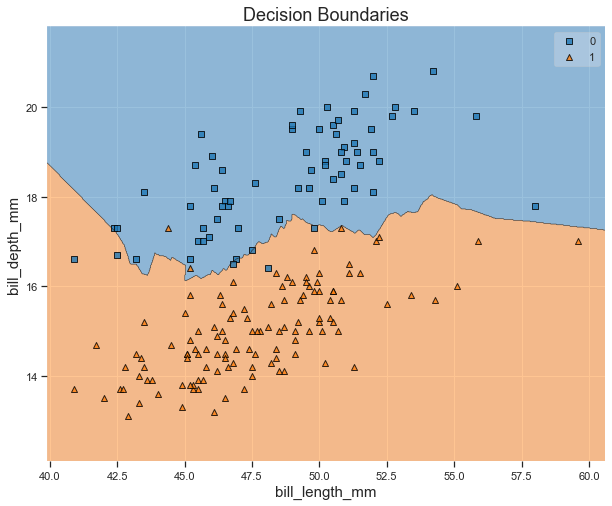

In [34]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = clf)
plt.xlabel('bill_length_mm', fontsize = 15)
plt.ylabel('bill_depth_mm', fontsize = 15)
plt.title("Decision Boundaries", fontsize = 18)
plt.show()

**As the plot shows, the doundary performs well**

**The confusion_matrix**

cf_matrix = [[19  2]
 [ 0 41]] 



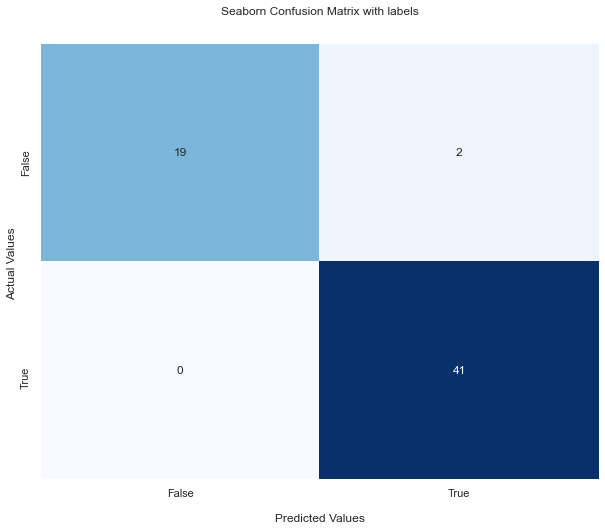

In [35]:
from sklearn.metrics import confusion_matrix

# Define the model
clf = KNeighborsClassifier(n_neighbors = 7)

# Fit the model
clf.fit(X_train,y_train)

# Make predictions on testing data
y_pred = clf.predict(X_test)

# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix 
print(f"cf_matrix = {cf_matrix} \n")

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

**The FN is 0 and FP is 2 which means the predicted values perform well**

In [36]:
from sklearn.metrics import classification_report

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.95      1.00      0.98        41

    accuracy                           0.97        62
   macro avg       0.98      0.95      0.96        62
weighted avg       0.97      0.97      0.97        62



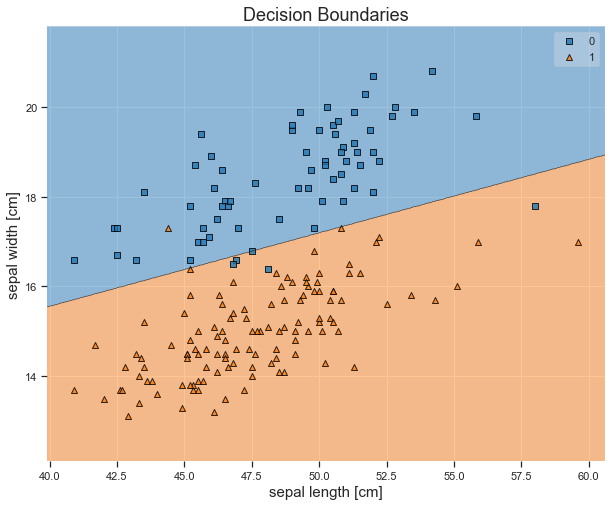

In [38]:
from sklearn.linear_model import LogisticRegression

clf2 = LogisticRegression(max_iter = 1000)
clf2.fit(X_train, y_train)

log_y_pred = clf2.predict(X_test)

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = clf2)
plt.xlabel('bill_length_mm', fontsize = 15)
plt.ylabel('bill_depth_mm', fontsize = 15)
plt.title("Decision Boundaries", fontsize = 18)
plt.show()


**As the plot shows, the doundary performs well**

cf_matrix = [[19  2]
 [ 0 41]] 



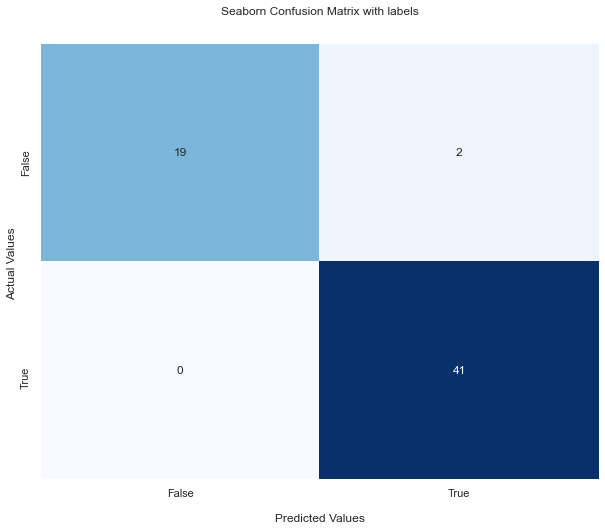

In [39]:
# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, log_y_pred)

# Print the confusion matrix 
print(f"cf_matrix = {cf_matrix} \n")

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [40]:
#Checking performance our model with classification report.
print(classification_report(y_test, log_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.95      1.00      0.98        41

    accuracy                           0.97        62
   macro avg       0.98      0.95      0.96        62
weighted avg       0.97      0.97      0.97        62



**The FN is 0 and FP is 1 which means the predicted values perform well. The report shows that f1-score is close to 1**

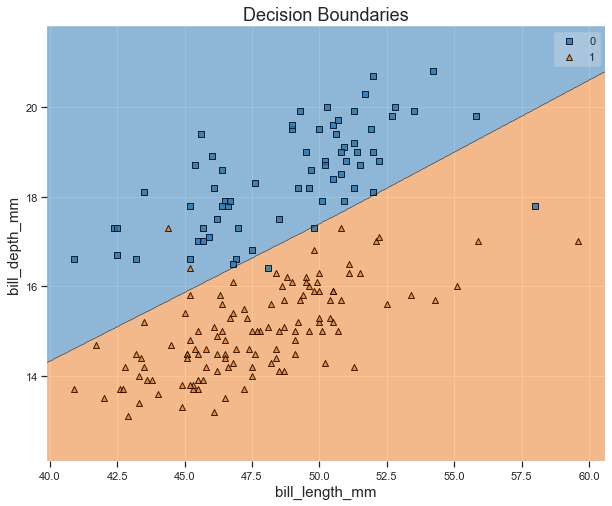

In [41]:
from sklearn.neural_network import MLPClassifier
clf3 = MLPClassifier(solver='lbfgs', alpha= 0.33,
                   hidden_layer_sizes=(120, 120), random_state=1, max_iter = 50_000)

clf3.fit(X_train, y_train)
net_y_pred = clf3.predict(X_test)

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = clf3)
plt.xlabel('bill_length_mm', fontsize = 15)
plt.ylabel('bill_depth_mm', fontsize = 15)
plt.title("Decision Boundaries", fontsize = 18)
plt.show()

cf_matrix = [[20  1]
 [ 0 41]] 



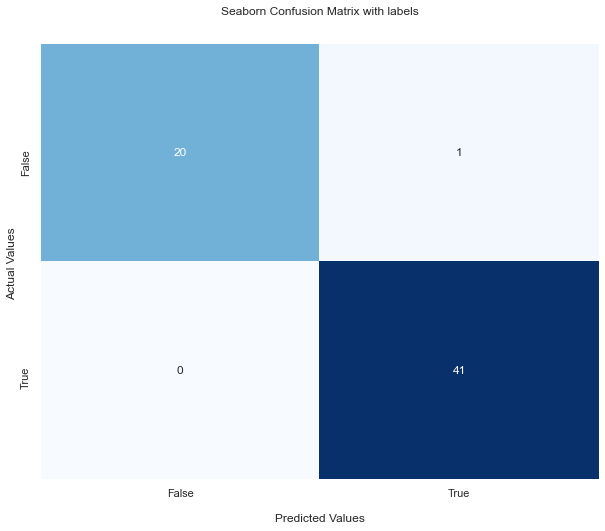

In [42]:
# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, net_y_pred)

# Print the confusion matrix 
print(f"cf_matrix = {cf_matrix} \n")

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [43]:
#Checking performance our model with classification report.
print(classification_report(y_test, net_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.98      1.00      0.99        41

    accuracy                           0.98        62
   macro avg       0.99      0.98      0.98        62
weighted avg       0.98      0.98      0.98        62



**The FN is 0 and FP is 1 which means the predicted values perform well. The report shows that f1-score is close to 1**

# Reference

1. Difference between Parametric vs Non-Parametric Models,https://vitalflux.com/difference-between-parametric-vs-non-parametric-models/
2.  Amal Joby,What Is K-Nearest Neighbor? ,https://learn.g2.com/k-nearest-neighbor#:~:text=The%20k%2Dnearest%20neighbors%20(KNN,nearest%20to%20it%20belong%20to.
3. K-nearest_neighbors_algorithm, From Wikipedia,https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
4. Euclidean distance, From Wikipedia,https://en.wikipedia.org/wiki/Euclidean_distance
5. http://theprofessionalspoint.blogspot.com/2019/02/how-to-choose-optimal-value-of-k-in-knn.html
6. scikit-learn, From Wikipedia,https://en.wikipedia.org/wiki/Scikit-learn